# EDA ON DEFAULT OF CREDIT CARD CLIENTS IN TAIWAN (UCI ML REPOSITORY)


* **Contributors: Sowmya Chenti Kumar, Poojitha Gowthaman**
* Group Number : #6


### 1. DESCRIPTION OF DATASET

The dataset consists information on default payments in Taiwan with supporting demographics, credit data, history of payments and bill amount statements of clients in Taiwan from April 2005 to September 2005

* ATTRIBUTE INFORMATION 

We have a total count of 25 variables in the dataset. The description of each of them are as follows - 


* **ID** : ID of each client
* **LIMIT_BAL** : Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX** : Gender (1=male, 2=female)
* **EDUCATION** : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE** : Marital status (1=married, 2=single, 3=others)
* **AGE** : Age in years
* **PAY_0** : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment   delay for nine months and above)
* **PAY_2** : Repayment status in August, 2005 (scale same as above)
* **PAY_3** : Repayment status in July, 2005 (scale same as above)
* **PAY_4** : Repayment status in June, 2005 (scale same as above)
* **PAY_5** : Repayment status in May, 2005 (scale same as above)
* **PAY_6** : Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1** : Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2** : Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3** : Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4** : Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5** : Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6** : Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1** : Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2** : Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3** : Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4** : Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5** : Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6** : Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month** : Default payment (1=yes, 0=no)

### 2. LOAD THE DATASET

* Required Packages

In [2]:
library("readxl")
library(dplyr)
library(skimr)
library(ggplot2)
library(tidyverse)
library(arules)
library(gridExtra)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'skimr' was built under R version 4.0.3"
Warning message:
"package 'tidyverse' was built under R version 4.0.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.3     v purrr   0.3.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

Warning message:
"package 'readr' was built under R version 4.0.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'arules' was built under R version 4.0.3"
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack



Attaching package: 'arules'

In [3]:
data <- read_excel("default of credit card clients.xls")

# View the data in detail:
head(data)

New names:
* `` -> ...1



...1,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 3. EXPLORE THE DATASET

In [4]:
str(data)

tibble [30,001 × 25] (S3: tbl_df/tbl/data.frame)
 $ ...1: chr [1:30001] "ID" "1" "2" "3" ...
 $ X1  : chr [1:30001] "LIMIT_BAL" "20000" "120000" "90000" ...
 $ X2  : chr [1:30001] "SEX" "2" "2" "2" ...
 $ X3  : chr [1:30001] "EDUCATION" "2" "2" "2" ...
 $ X4  : chr [1:30001] "MARRIAGE" "1" "2" "2" ...
 $ X5  : chr [1:30001] "AGE" "24" "26" "34" ...
 $ X6  : chr [1:30001] "PAY_0" "2" "-1" "0" ...
 $ X7  : chr [1:30001] "PAY_2" "2" "2" "0" ...
 $ X8  : chr [1:30001] "PAY_3" "-1" "0" "0" ...
 $ X9  : chr [1:30001] "PAY_4" "-1" "0" "0" ...
 $ X10 : chr [1:30001] "PAY_5" "-2" "0" "0" ...
 $ X11 : chr [1:30001] "PAY_6" "-2" "2" "0" ...
 $ X12 : chr [1:30001] "BILL_AMT1" "3913" "2682" "29239" ...
 $ X13 : chr [1:30001] "BILL_AMT2" "3102" "1725" "14027" ...
 $ X14 : chr [1:30001] "BILL_AMT3" "689" "2682" "13559" ...
 $ X15 : chr [1:30001] "BILL_AMT4" "0" "3272" "14331" ...
 $ X16 : chr [1:30001] "BILL_AMT5" "0" "3455" "14948" ...
 $ X17 : chr [1:30001] "BILL_AMT6" "0" "3261" "15549" ...
 $ X18

### 4. INITIAL THOUGHTS

A first look at the dataset tells that we have the data in the form of a tibble with character datatypes for all columns. It would be advisable to process certain columns as numeric and read them as factors for data wrangling purposes

* Numeric Columns : LIMIT_BAL, AGE, BILL_AMT, PAY_AMT
* Categorical columns : SEX, EDUCATION, MARRIAGE, PAY_, default payment next month

#### checking for null values

* Dimensions of the data

In [5]:
dim(data)

[1] 30001    25

* Summary of the data

In [6]:
summary(data)

     ...1                X1                 X2                 X3           
 Length:30001       Length:30001       Length:30001       Length:30001      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
      X4                 X5                 X6                 X7           
 Length:30001       Length:30001       Length:30001       Length:30001      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
      X8                 X9                X10                X11           
 Length:30001       Length:30001       Length:30001       Length:30001      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
     X12                X13                X14                X15           

* **Explaining the Variation in the data**

* We can observe a fair bit of variation in the LIMIT_BAL. The credit limit ranges from 10K upto a million. That gives us the sense of the income group of population we are dealing with.

* From the data we can see that though age is a numerical column we can get better insights from them if we bin them into 4 different categories and split them as low-age group to high age group.

* We can see there are some negative values in the PAY_AMT columns and BILL_AMT columns these can suggest that the person has already made the payment before the due date over paid about the over all bill balance which gets carried over to the next month.


* Skimming through the entire dataset

In [7]:
skim(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             30001 
Number of columns          25    
_______________________          
Column type frequency:           
  character                25    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
   skim_variable n_missing complete_rate   min   max empty n_unique whitespace
 1 ...1                  0             1     1     5     0    30001          0
 2 X1                    0             1     5     9     0       82          0
 3 X2                    0             1     1     3     0        3          0
 4 X3                    0             1     1     9     0        8          0
 5 X4                    0             1     1     8     0        5          0
 6 X5                    0             1     2     3     0       57          0
 7 X6             

From the n_missing columns, there are no null values in any of the columns

### 5. DATA WRANGLING

In [4]:
names(data) <- as.matrix(data[1, ])
data <- data[-1, ]
data[] <- lapply(data, function(x) type.convert(as.character(x)))

In [5]:
head(data)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [6]:
unique(data$SEX)
unique(data$EDUCATION)
unique(data$MARRIAGE)
#unique(data$AGE)
data$AGE <- discretize(data$AGE,method='interval',breaks=4)

[1] 2 1

[1] 2 1 3 5 4 6 0

[1] 1 2 3 0

From the categorical values that we find here, there are many categories which are not defined properly, for example in Education there are supposed to be just 4 categories. However, we can see 6 values and hence we take the undefined categories and combine them under others 

In [7]:
# Univariant analysis:

#renaming the last column
names(data)[names(data) == "default payment next month"] <- "default_payment_next_month"

# Sanitize the education column:
data$EDUCATION[data$EDUCATION>4] <- 4
data$EDUCATION[data$EDUCATION==0] <- 4

# Sanitize the marriage column:
data$MARRIAGE[data$MARRIAGE==0] <- 3

# There are two values where 1- male and 2-female:
data= data %>% 
  mutate(
    SEX = ifelse(SEX == 1, "Male","Female")
  )
# Similarly do this with education column:
data= data %>% 
  mutate(EDUCATION = case_when(
    EDUCATION == 1 ~ "Graduate School",
    EDUCATION == 2 ~ "University",
    EDUCATION == 3 ~ "High School",
    EDUCATION == 4 ~ "Others"))

# Similarly with the Marriage column:
data= data %>%
  mutate(MARRIAGE = case_when(
    MARRIAGE == 1 ~ "Married",
    MARRIAGE ==2 ~ "Single",
    MARRIAGE == 3 ~ "Others"
  ))

head(data,3)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
<int>,<int>,<chr>,<chr>,<chr>,<fct>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,20000,Female,University,Married,"[21,35.5)",2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,Female,University,Single,"[21,35.5)",-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,Female,University,Single,"[21,35.5)",0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


### 6. DATA ANALYSIS AND VISUALIZATIONS

#### Analyzing the variation of limit balance with the level of education
Analyzing how the limit balance changes within people who vary in their level of education. It is a common feeling that a well learned person will be more well behaved in terms of using their money.

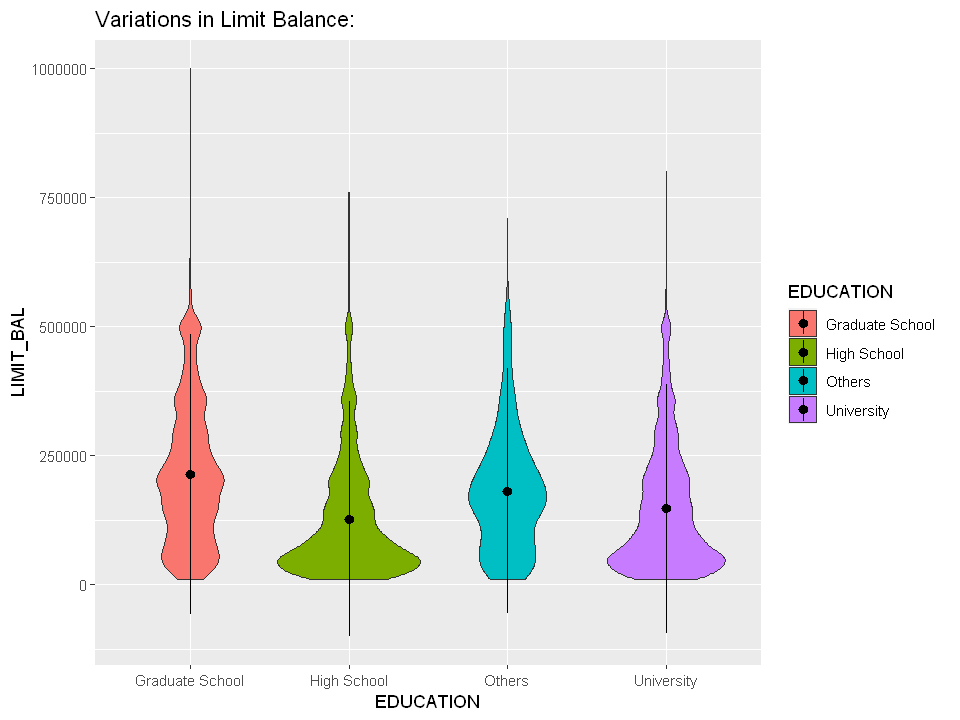

In [9]:
ggplot(data = data)+
  aes(x= EDUCATION, y=LIMIT_BAL,
      fill= EDUCATION)+
  geom_violin()+
  stat_summary(fun.data = "mean_sdl",
                geom="pointrange",color="black")+
  ggtitle("Variations in Limit Balance:")
options(repr.plot.width=8, repr.plot.height=6)

From the voilin plots generated we can see that the plots created can a broader base in the case of university and High school, but the plot with respect to the Graduate school seems to be fairly more spread evenly across the limit balance ranges. Which is slightly agreeing with our previous claim - more educated a person is more better they are with managing their money

### Analysing the variation of account balance with age:

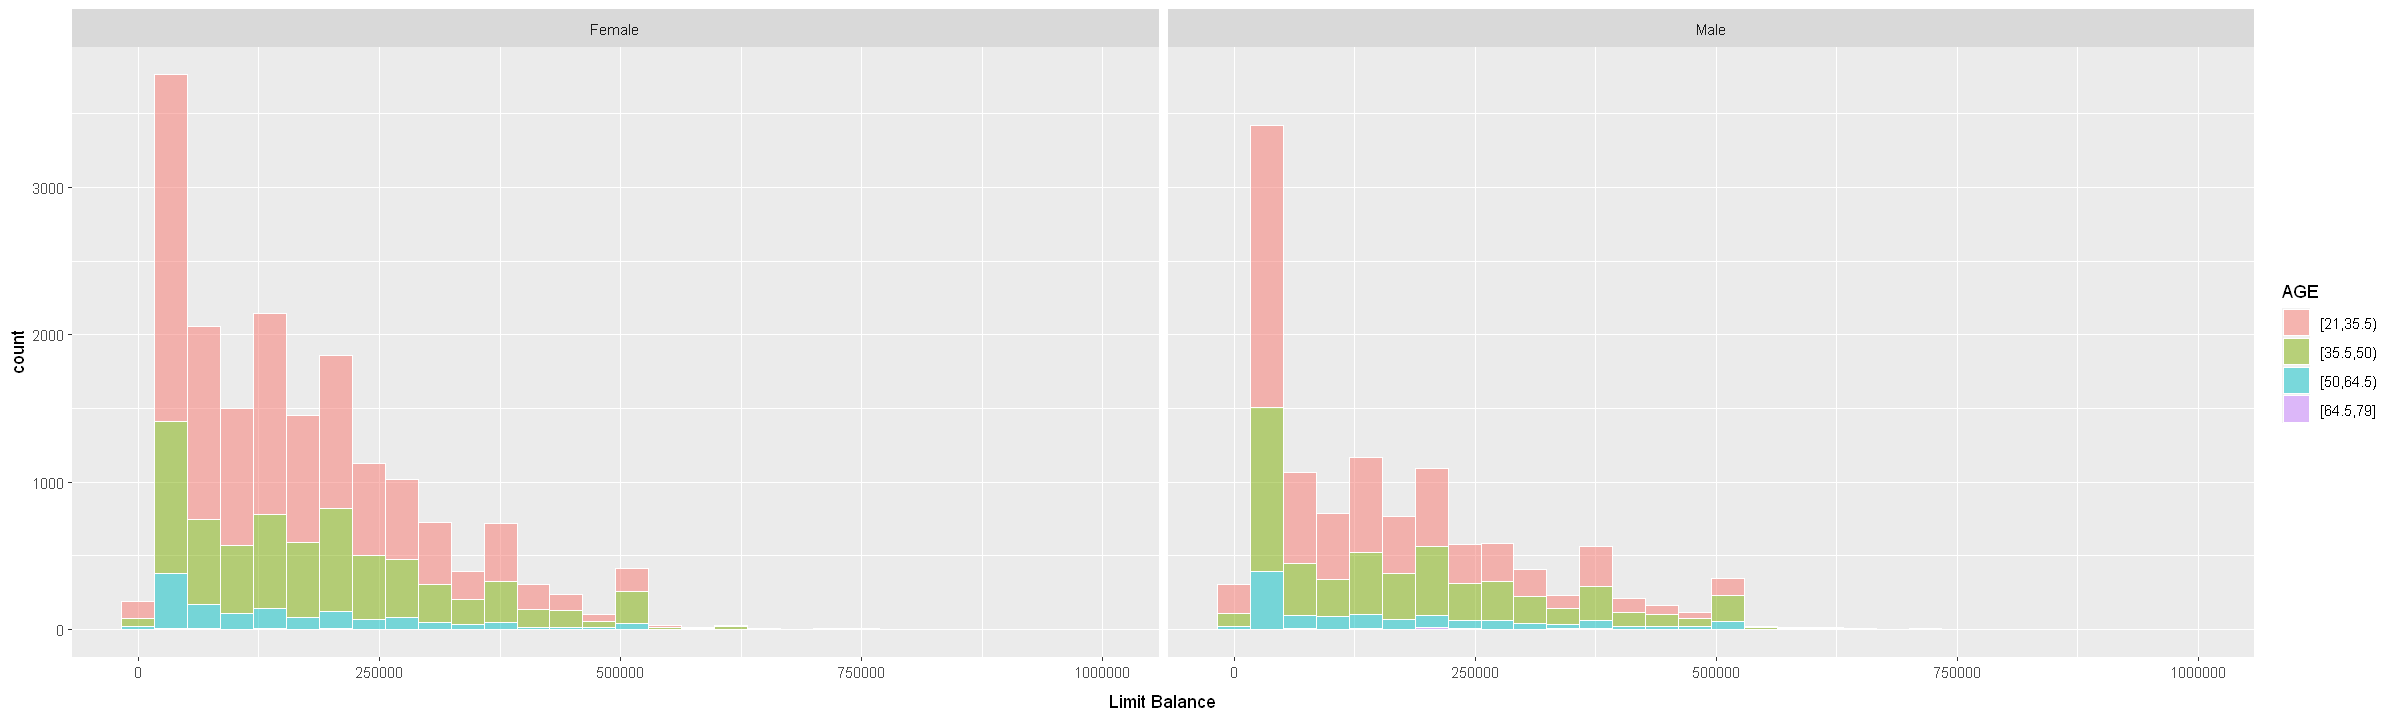

In [11]:
ggplot(data = data)+
  aes(x=LIMIT_BAL, fill = AGE)+
  geom_histogram(bins=30,color="white",alpha=0.5)+
  facet_wrap(~data$SEX)+
  xlab("Limit Balance")+
scale_fill_discrete(name= "AGE")
options(repr.plot.width=20, repr.plot.height=6)

From these two graphs we an see that the younger age groups are by far the most lethargic with respect to their money handling. And when we split the graph to understand better between men and women, men are more linient with maintaining their limit balance. In both the cases there are more people with low limit balance on their credit card than high.However most of them tend to be young males.

#### Analysing the behavior of limit balance among people who always pay late and who seldom pay early:

In [12]:
data$PAY_0 <- as.numeric(data$PAY_0)

# To obatin this we split our dataframe into 2 parts - people who always pay late and who sometimes pay early:
data_late<- data %>%
  filter(data$PAY_0 >0 & data$PAY_2 >0 &
           data$PAY_3 >0 & data$PAY_4 > 0 &
           data$PAY_5 >0 & data$PAY_6 >0) 

data_late<- data_late[data_late$MARRIAGE != "Others",]
head(data_late,3)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
<int>,<int>,<chr>,<chr>,<chr>,<fct>,<dbl>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
63,50000,Male,Graduate School,Single,"[21,35.5)",2,2,2,2,...,25865,27667,28264,0,2700,0,2225,1200,0,1
72,320000,Male,University,Single,"[21,35.5)",2,2,2,2,...,58622,62307,63526,2500,2500,0,4800,2400,1600,1
91,200000,Male,Graduate School,Married,"[50,64.5)",2,2,2,2,...,144098,147124,149531,6300,5500,5500,5500,5000,5000,1


As the dataset cannot be split into people who always pay early as there will be no one like that we split the data as people who sometimes pay early

In [13]:
data_early<- data %>%
  filter(data$PAY_0 <0 | data$PAY_2 <0 |
           data$PAY_3 <0 | data$PAY_4 < 0 |
           data$PAY_5 <0 | data$PAY_6 <0)
data_early <- data_early[data_early$MARRIAGE != "Others",]
head(data_early,3)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
<int>,<int>,<chr>,<chr>,<chr>,<fct>,<dbl>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,20000,Female,University,Married,"[21,35.5)",2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,Female,University,Single,"[21,35.5)",-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
5,50000,Male,University,Married,"[50,64.5)",-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


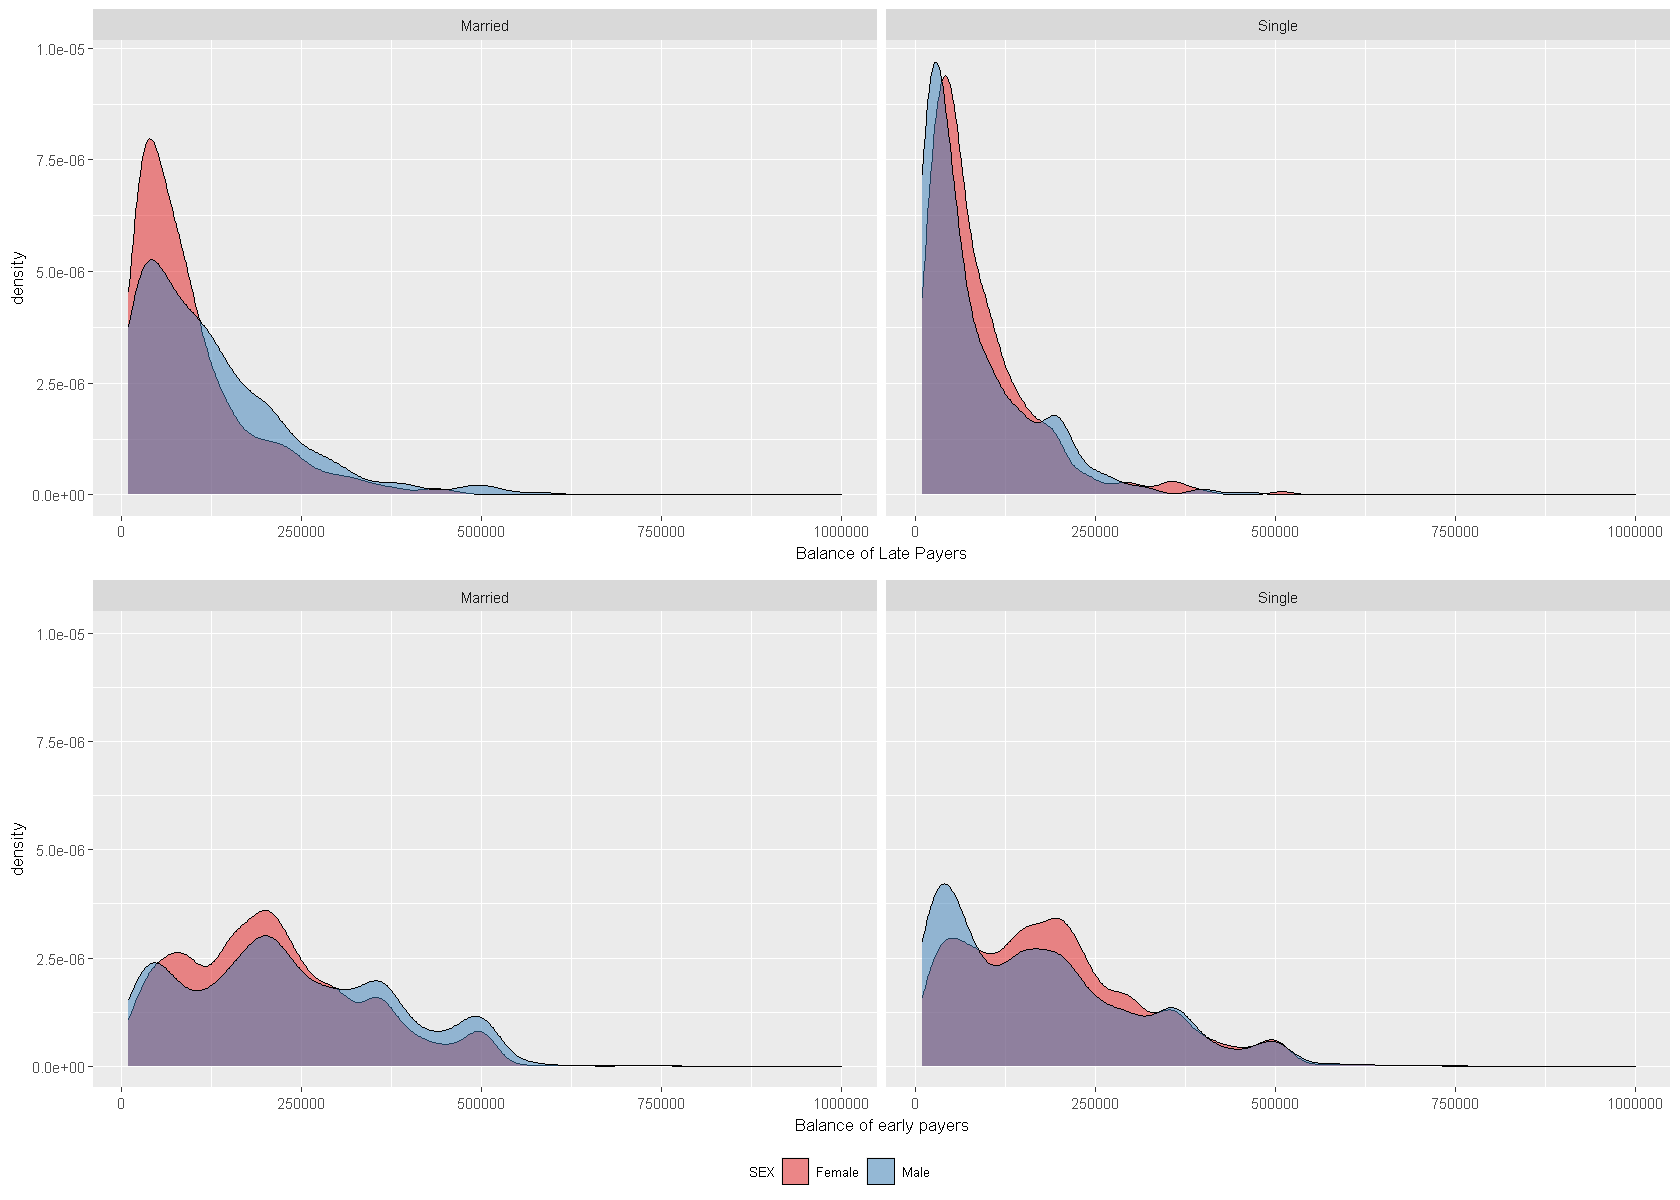

In [15]:
# Now we are creating the required plots:
# Plot for the late_payers data
g1<-ggplot(data = data_late)+
  aes(x= LIMIT_BAL, fill= SEX)+
  geom_density(alpha=0.5)+
  xlim(10000,1000000)+
  xlab("Balance of Late Payers")+
  facet_wrap(~data_late$MARRIAGE)+
  theme(legend.position = "none",
        axis.title = element_text(size=10))+
  scale_fill_brewer(palette="Set1")

# Plot for the early payer's data
g2<- ggplot(data = data_early)+
  aes(x= LIMIT_BAL, fill= SEX)+
  geom_density(alpha=0.5)+
  ylim(0,1*10^-5 )+
  xlab("Balance of early payers")+
  facet_wrap(~data_early$MARRIAGE)+
  theme(legend.position = "none", 
        axis.title = element_text(size=10)
        )+
  scale_fill_brewer(palette="Set1")
 
# A plot to extract the legend from
g2_legend<- ggplot(data = data_early)+
  aes(x= LIMIT_BAL, fill= SEX)+
  geom_density(alpha=0.5)+
  ylim(0,1*10^-5 )+
  facet_wrap(~data_early$MARRIAGE)+
  theme(legend.position = "bottom",
        legend.text = element_text(size=8),
        legend.title = element_text(size=8),
        axis.title = element_text(size=10)
  )+
  scale_fill_brewer(palette="Set1")

#library(gridExtra)

# Combine both the graphs into one chart:
extract_legend <- function(my_ggp){
  step1 <- ggplot_gtable(ggplot_build(my_ggp))
  step2 <- which(sapply(step1$grobs, function(x) x$name) == "guide-box")
  step3 <- step1$grobs[[step2]]
  return(step3)
}

shared_legend <- extract_legend(g2_legend)

grid.arrange(g1,g2,shared_legend,heights=c(3, 3, 0.3))

options(repr.plot.width=14, repr.plot.height=10)

From the above graph we can see that the limit balance is pretty spread out and not just concentrated in the lower values for 'Early Payers' from this we can conclude that the early players are more disciplined with respect to their money as compared to the people who always pay late. We can see a huge hike in the values for lower values of the account balance. Also there is not much significant level of difference in discipline seen between the married and single people. However single men tend to be more lethargic in terms of their balance irrespective of the fact that they are paying early or late

#### Analysing the distribution of limit_balance for defaulters and non defaulters

To get a sense of the LIMIT_BALANCE in the dataset, it would be sensible to get a distribution of the data for defaulters and non defaulters. This will better help us understand the range of the amount that is allocated and potential reasons that could help us understand from the credit limit scores. This will potentialy give some insights to the bank on predicting the balances with the factors combined above while approving a new application. 

In [17]:
class_default <- data[data$default_payment_next_month == 1,]$LIMIT_BAL
class_no_default <- data[data$default_payment_next_month == 0, ]$LIMIT_BAL


df_defaults <- data.frame(matrix(unlist(class_default), nrow=length(class_default), byrow=T))
df_no_defaults <- data.frame(matrix(unlist(class_no_default),nrow=length(class_no_default), byrow=T ))

names(df_defaults)[names(df_defaults) == "matrix.unlist.class_default...nrow...length.class_default...byrow...T."] <- "Class_1_defaults"

names(df_no_defaults)[names(df_no_defaults) == "matrix.unlist.class_no_default...nrow...length.class_no_default..."] <- "Class_0No_defaults"

#### Defaulters

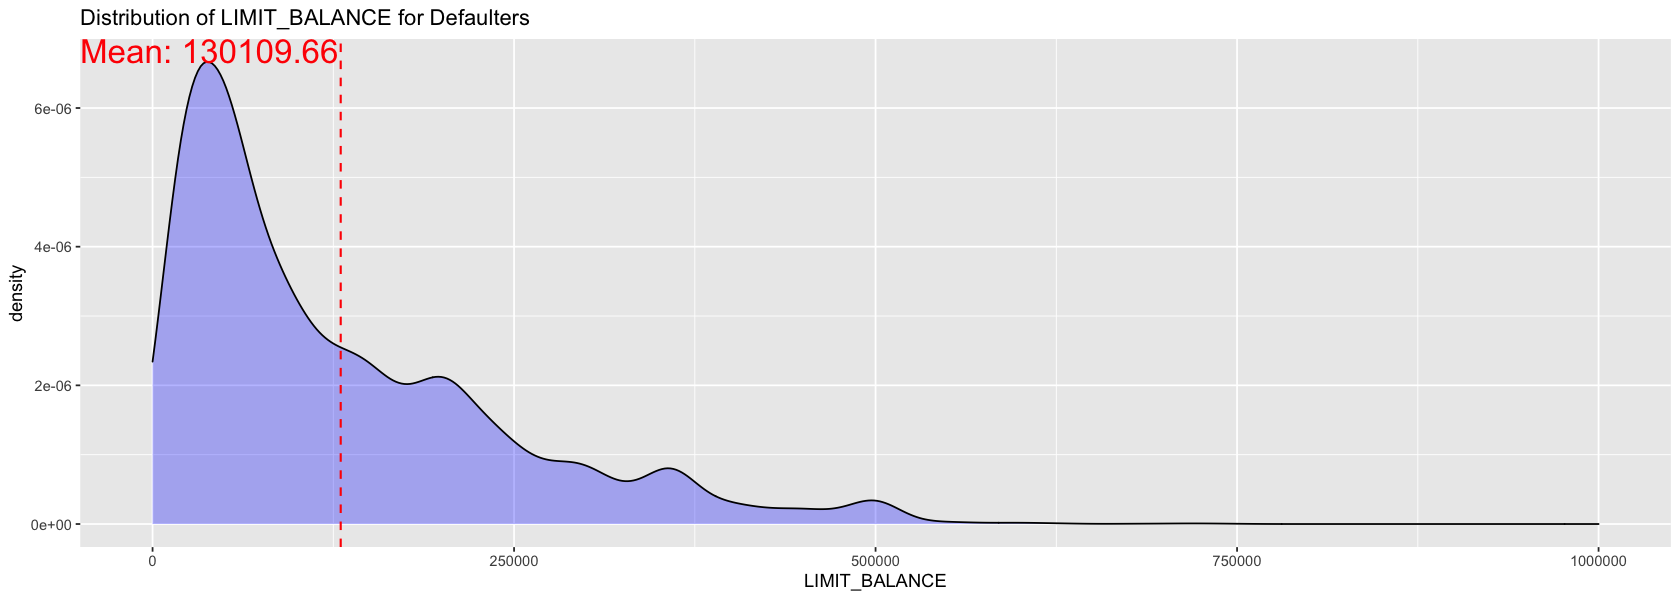

In [20]:
ggplot(df_defaults, aes(x =Class_1_defaults )) +
  geom_density(fill = 'blue', alpha = 0.3) +
  geom_vline(xintercept = mean(df_defaults$Class_1_defaults), col = "red", 
             linetype = "dashed", size = 0.6) +
  annotate("text", 
           x = -Inf, y = Inf, 
           label = paste("Mean:", round(mean(df_defaults$Class_1_defaults), digits = 2)), 
           hjust = 0, vjust = 1, col = "red", size = 7)+
  xlim(0, 1000000) +
  ggtitle("Distribution of LIMIT_BALANCE for Defaulters") + 
  labs(x = 'LIMIT_BALANCE')


* The range of the entire limit balance is observed in the range 0 to 580K.
* The mean of the distribution for the limit balance for defaulters is found to be at ~130K. 
* And most of their balances lie within the range of 0 to 100K
* * *

#### Non Defaulters

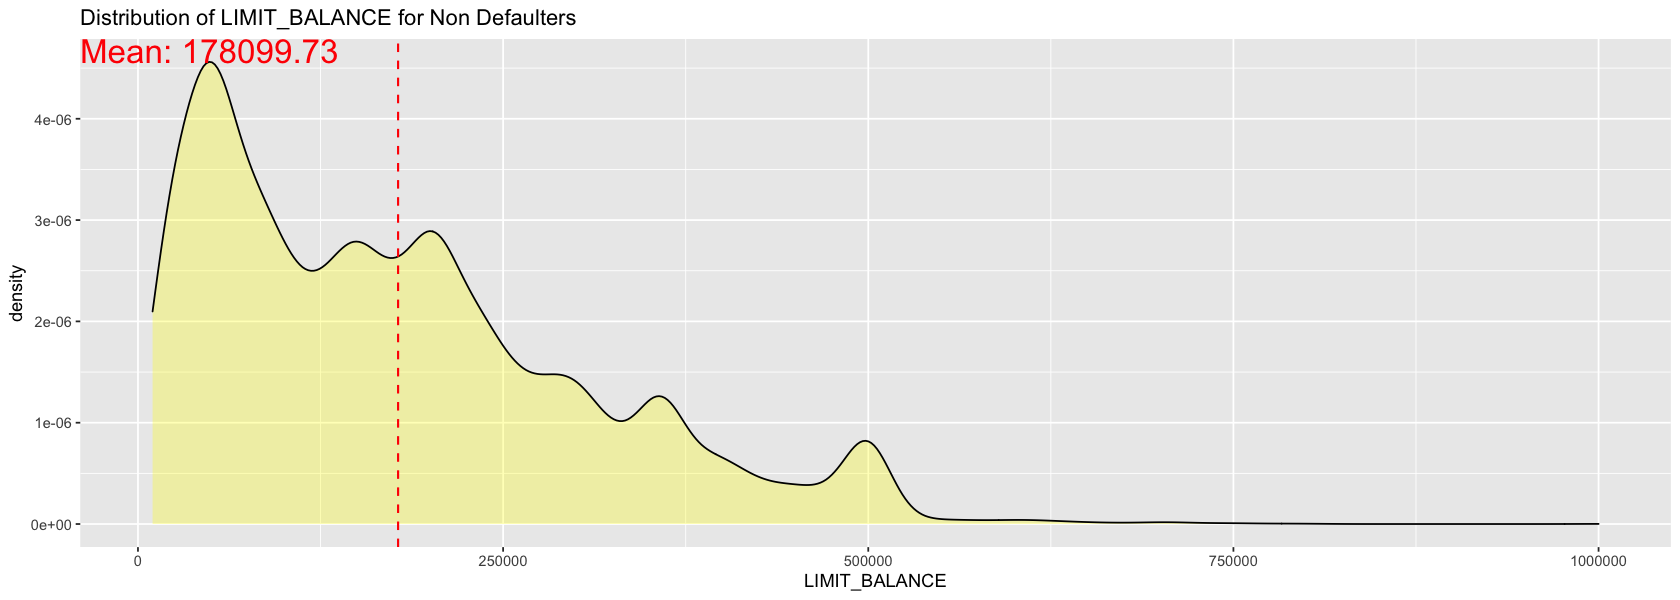

In [22]:
ggplot(df_no_defaults, aes(x =Class_0No_defaults )) +
  geom_density(fill = 'yellow', alpha = 0.3) +
  geom_vline(xintercept = mean(df_no_defaults$Class_0No_defaults), col = "red", 
             linetype = "dashed", size = 0.6) +
  annotate("text", 
           x = -Inf, y = Inf, 
           label = paste("Mean:", round(mean(df_no_defaults$Class_0No_defaults), digits = 2)), 
           hjust = 0, vjust = 1, col = "red", size = 7) +
   ggtitle("Distribution of LIMIT_BALANCE for Non Defaulters") +
    labs(x = "LIMIT_BALANCE")


* The range of the entire limit balance is observed in the range 0 to 700K.
* The mean of the distribution for the limit balance for non defaulters is found to be at ~180K. 
* And most of their balances lie within the range of 0 to 400K
* * * 

#### Understanding the relationship between SEX and LIMIT_BAL

It becomes very essential to understand the distribution of sexes in the population while handling credit limits. It is by far by the notion that men maintain a higher pool of credit limits. We can dive deep into investigating weather that is true.

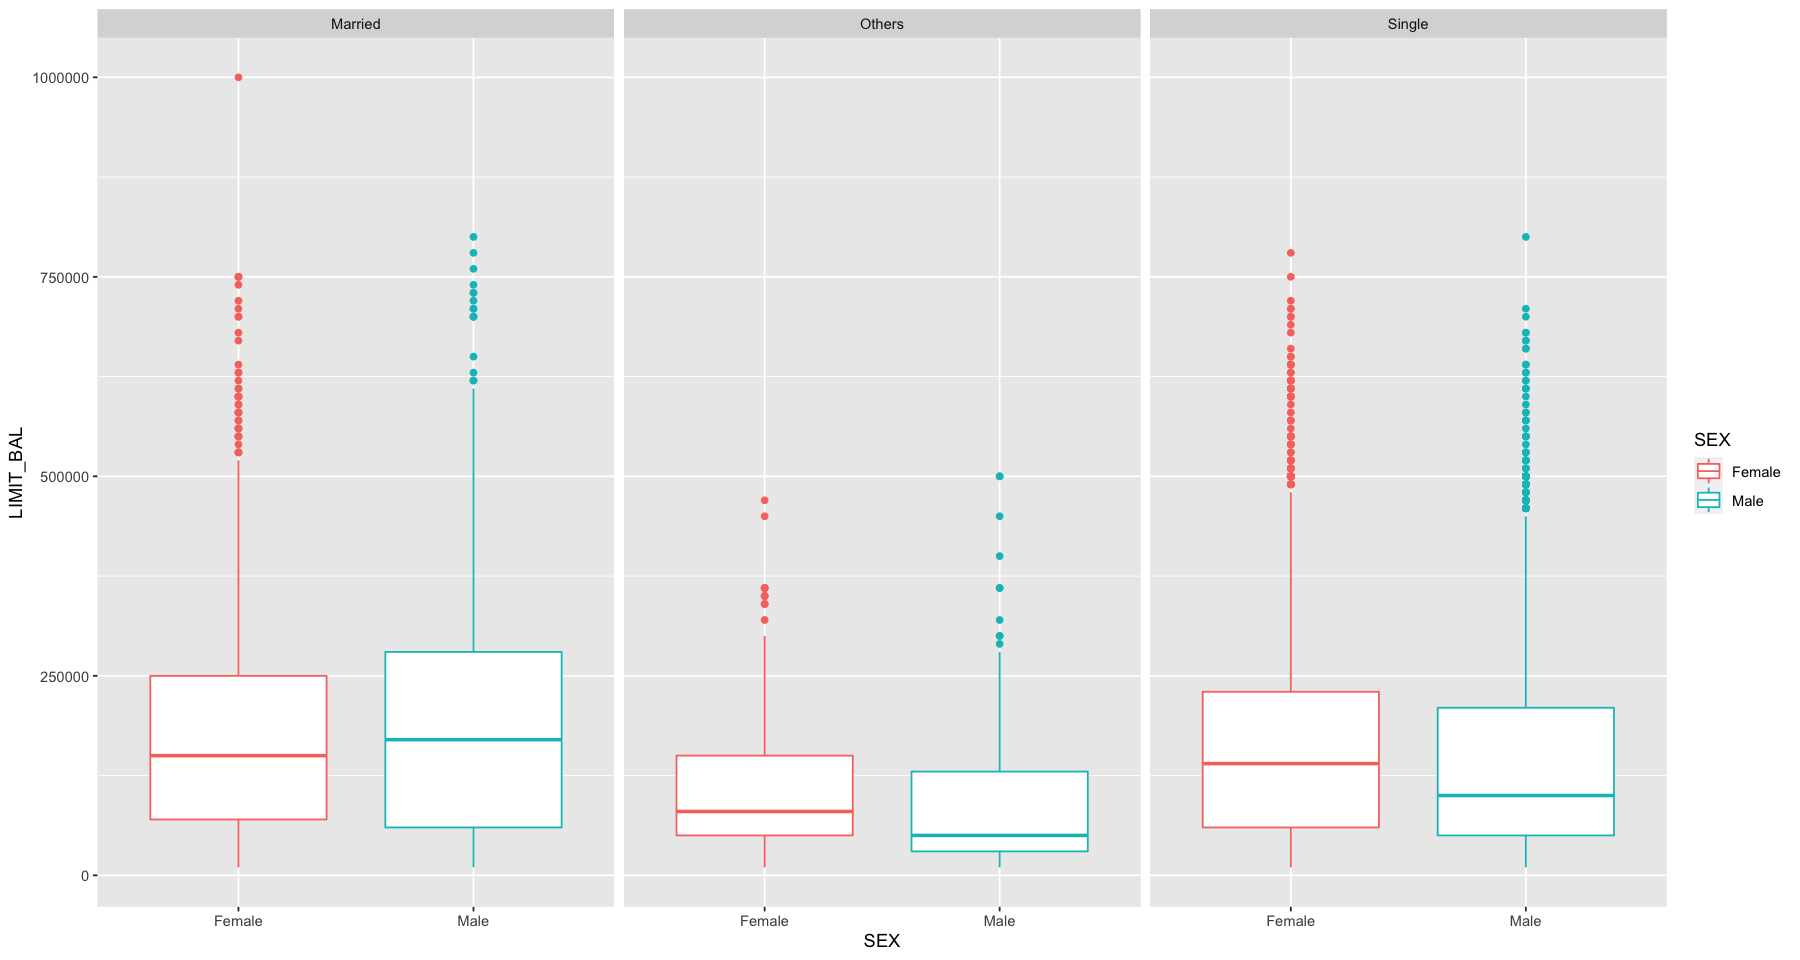

In [31]:
options(repr.plot.width=15,repr.plot.height=8)
ggplot(data = data, aes(x = SEX, y = LIMIT_BAL, color = SEX)) +
         geom_boxplot()+facet_wrap(~data$MARRIAGE)

**GENERAL THOUGHTS**
The limit balances by sexes are faceted by Marital Status. The limit balance is approximately balanced between males and females.The females seem to have a much balanced quartile distribution and there is seems to be an outlier in the boxplot at 1 million in the married section. We can only guess that she would possibly a highly successful Amex Black Card holder.
* Married : Males tend to have a way higher limit balance than females under this scenario. This possibly tells us that married men take on additional financial responsibilities which is event with the quartile distribution of the box plot. Females seem to have greater Q2 and Q3.
* Others : We mostly have unmarried, unknown or Significant others status under this category. And surprisingly, we see females tending to have higher limit balances with greater Q2 and Q3. The outliers in the male boxplot seems to be a bit of a concern here.
* Single: This data gives us an entirely different perspective with the females taking the higher chunk of limit balances. This possibly tells us that single women spend more! The males seem to be having a bigger Q3 and Q4 as well

### 7. RESEARCH QUESTIONS

* Can the limit balance of a person vary (behavior of a person in regards to their limit balance) vary with respect to the a person's sex or marital status? We did see from the graphs that there is an overall dicipline among the people who pay early as compared to people who always pay late.  Though the graph was faceted and the split on the basis of sex and marital staus, it failed to provide a stronger insight on this. Hence we can do further research on how the money handling behavior of a person varies depending on their sex and how it changes after marriage. We would need more data like spendings of a person or other charecterstics which support this claim of ours. 

* In reference to the distribution of limit_balance for defaulters and non defaulters, we observe that the mean of LIMIT_BALANCE value for `DEFAULTERS` is ~130K and the mean of LIMIT_BALANCE value for `NON DEFAULTERS` is ~180K. It is intuitive to assume that non defaulters get a higher credit limit than defaulters, however, increase in LIMIT_BALANCE is associated various other factors than just payments on time. It is associated with income, family income and credit scores the person holds. We would want more data like income and number of bank accounts to understand why this is the case.
We would want to deep dive into factors of payment defaults among students and family. Students might just have huge loan that is occupying a significant amount of the balance and they default only because of the erratic partime jobs. Whereas, they would otherwise develop to maintain a good credit history. This segregation of data over students or work professionals would also help us understand the allocation of limit balances by the banking corporation.

### 8. SUMMARY AND CONCLUSIONS 

The dataset gives an exhaustive list of Payment delays and limit balances. Through thorough analysis of defaulters vs non defaulters, we could get some sense of how the credit balances in the range and their mean value. We can normalize the graphs for further insights and predictive modeling purposes. We also got some sense of how factors like marriage and education play a role in limit balances among men and women. We aim to work deeper on feature selection using the payment and bill amount columns further.